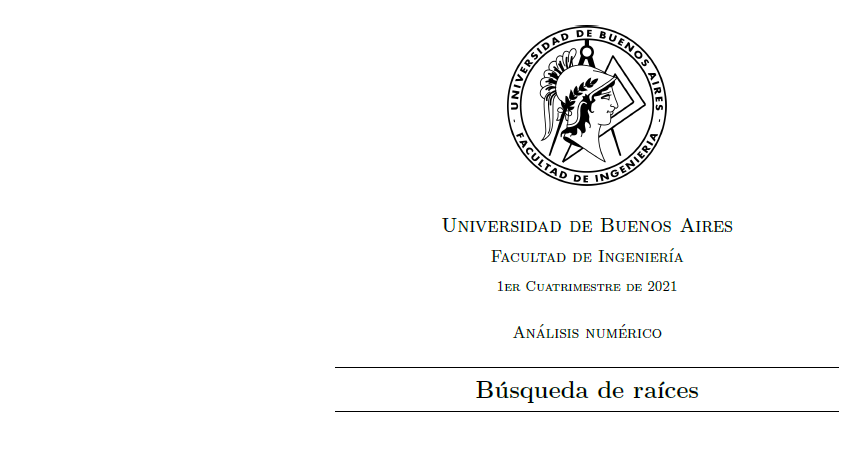

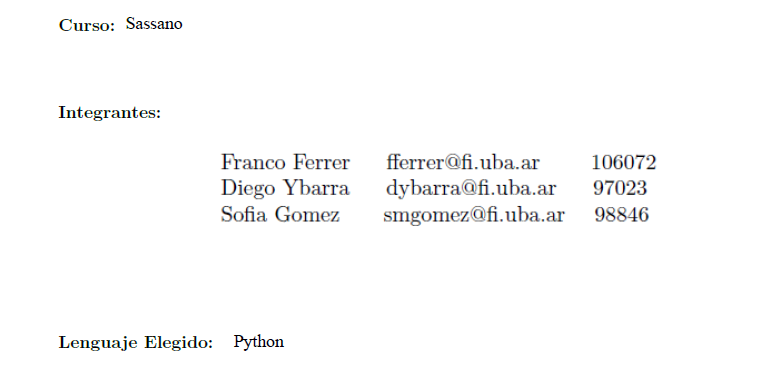

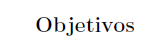



*   Implementar los distintos métodos de búsqueda de raices vistos en clase 

*   Expresar correctamente los valores calculados junto a sus respectivos errores 

*   Comparar los resultados obtenidos en el trabajo con los resultados teóricos 



#Introducción

En este documento tratamos diversos métodos para hallar raices, cómo se comportan, cuándo es conveniente usarlos y qué parametros pueden afectar a la eficiencia de los mismos. Por otra parte también se incluye la teoría de errores para expresar los resultados.
Iremos enunciando las consignas del trabajo y colocando debajo de cada una de ellas su desarrollo y resolución 

#Orden de resolución

1.   Aplicación de un método a lo cotidiano
2.   Definicion de funciones para aproximar pi
3.   Cálculos utilizando representaciones de 32 y 64 bits
4.   Cálculos utilizando calculadora
5.   Comparación de resultados
6.   Definición de las funciones a trabajar
7.   Gráfico de las funciones
8.   Definición de los métodos de raíces
9.   Impresion de las historias para cada función
10.   Cálculo de las raices haciendo uso de librerias internas de python 
11.   Para cada función:       
  *   Cálculo del orden de convergencia 
  *   Cálculo de la constante asintotica 
  *   Conclusiones de los resultados







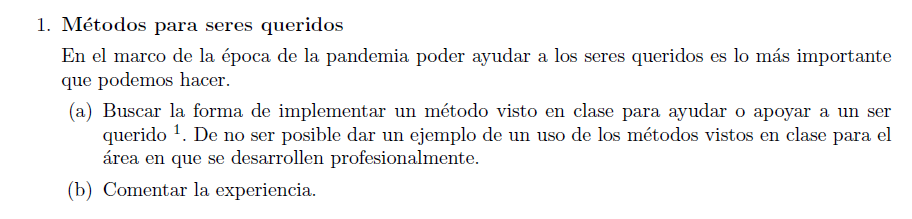

Ayudamos a un ser querido cuando nos llamó y nos dijo que necesitaba volver a charlar con un viejo amigo que vivia en capital, pero habían pasado tantos
años que ya no recordaba su numero de telefono. Por suerte, él aún tenía una guía telefónica guardada de hace años, y quería buscar ahí el numero de su amigo. Para no tardar tanto tiempo en encontrarlo, propusimos usar uno de los métodos aprendidos en la materia. La  guía telefónica es  un claro ejemplo de  una  función  continua  de  la  que  no  puedo  tener  información  de  su  derivada,entonces tengo que aplicar el método de la Bisección. 

 Para esto se puede abrir en la mitad de la guía telefónica y nos fijamos en el primer nombre que aparece, si este es menor alfabéticamente al nombre buscado, descartamos la primera mitad de la guía y volvemos a repetir el procedimiento. Si en cambio, el primer nombre que aparece es mayor alfabéticamente, lo que descartamos es la segunda mitad de la guía. Podemos continuar repitiendo estos pasos hasta llegar a un criterio de error, que en nuestro caso seria por ejemplo, que el nombre observado sea menor alfabeticamente al buscado y sus primeras 6 letras sean las mismas. Cuando se cumplan esto criterios, podemos detenernos y estar seguros que el nombre buscado se encuentra en la misma página o por lo menos lo suficientemente cerca como para que no sea un problema encontrarlo.

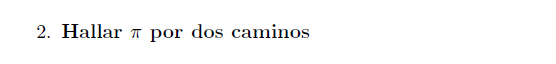

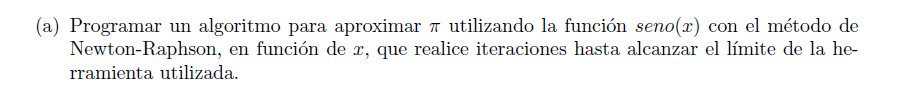

Codigo Newton Raphson

In [ ]:
import numpy as np

def f(x):
    return np.sin(x)

def f_derivada(x):
    return np.cos(x)    

def Newton_Raphson(f, f_derivada, p0, tolerancia, max_iteraciones, tipo_de_flotante):

  boundZero = 1e-15
  historia = np.zeros((max_iteraciones, 2), dtype= tipo_de_flotante)
  p_prev = tipo_de_flotante(p0)
  historia[0] = (0, p_prev)

  i = 1

  while i < max_iteraciones:

    if np.abs(f_derivada(p_prev)) < boundZero:
      print("Derivada se anula en un punto candidato de la iteracion")
    
    p = p_prev - f(p_prev)/f_derivada(p_prev)
    historia[i] = (i,p)

    if np.abs((p - p_prev) / p)  < tolerancia:
      historia = historia[:i + 1]
      return p, i, historia

    i = i + 1
    p_prev = p

  print("No convergió")
  return p0, -1, historia


def imprimir_tabla_NR(tolerancia, historia):
    print("Newton Raphson:")
    
    print("|----------------------------------------------------------------")
    print("|Iteracion", "\t", "Raiz", "\t\t", "Tolerancia usada:", tolerancia)
    print("|----------------------------------------------------------------")
    for elemento in historia:
        print ("|", elemento[0], "\t\t", elemento[1])
    print("|----------------------------------------------------------------\n")
    

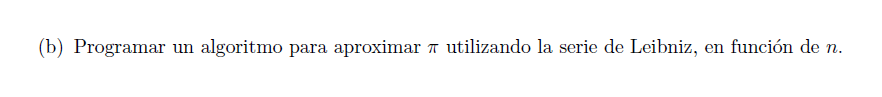

Codigo de Leibniz

In [ ]:
def pi_leibniz(n, tipo_de_float):
    pi = tipo_de_float(0)
    multiplicador = tipo_de_float(4)
    uno = tipo_de_float(1)
    dos = tipo_de_float(2)

    for k in range(1, n + 1):
        pi += (-uno)**(tipo_de_float(k) + uno) / (dos * tipo_de_float(k) - uno)

    return multiplicador * pi

def n(i):
    return 10 ** i

def calcular_leibniz(tipo_de_float):
    print("Serie de Leibniz:")
    print("|----------------------------------------------------------------")
    for i in range(1,6):
        print("| Con n = ", n(i), "la aproximacion de Pi es:", pi_leibniz(n(i), tipo_de_float))
    print("|----------------------------------------------------------------")


def calcular_error_leibniz(n, tipo_de_float):
    #Tomo como error lo que falta sumar
    error = tipo_de_float(0)
    multiplicador = tipo_de_float(4)
    uno = tipo_de_float(1)
    dos = tipo_de_float(2)

    for k in range(n + 1,n + 100):
        error += (-uno)**(tipo_de_float(k) + uno) / (dos * tipo_de_float(k) - uno)

    return multiplicador * error
    

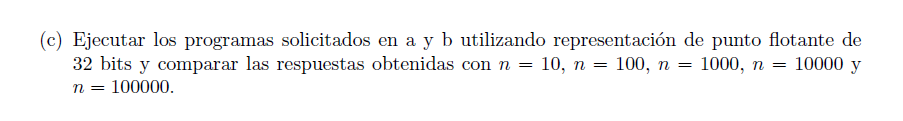

Ejecución con punto flotante de 32 Bits

In [ ]:
#PARAMETROS NEWTON RAPHSON 

""" Siendo que pi es raiz de la funcion seno, tenemos que elegir una semilla que se encuentra en el intervalo abierto (0,2pi), y ademas
que se encuentre lo suficientemente lejos de los extremos del intervalo para que no converja hacia otra raiz. Nosotros optamos por utilizar
el valor 3 para Newton Raphson. Elegimos una tolerancia de 1e-7 ya que con punto flotante de 32 bits nos aseguramos de tener 7 digitos signicativos bien"""

tolerancia = 1e-7 
semilla = np.float32(3)
num_iteraciones = 10

raiz, iteraciones, historia = Newton_Raphson(f, f_derivada, semilla, tolerancia, num_iteraciones, np.float32)
imprimir_tabla_NR(tolerancia, historia)

#LEIBNIZ
calcular_leibniz(np.float32)


Newton Raphson:
|----------------------------------------------------------------
|Iteracion 	 Raiz 		 Tolerancia usada: 1e-07
|----------------------------------------------------------------
| 0.0 		 3.0
| 1.0 		 3.1425467
| 2.0 		 3.1415927
| 3.0 		 3.1415927
|----------------------------------------------------------------

Serie de Leibniz:
|----------------------------------------------------------------
| Con n =  10 la aproximacion de Pi es: 3.0418396
| Con n =  100 la aproximacion de Pi es: 3.1315925
| Con n =  1000 la aproximacion de Pi es: 3.1405926
| Con n =  10000 la aproximacion de Pi es: 3.1414986
| Con n =  100000 la aproximacion de Pi es: 3.1415858
|----------------------------------------------------------------


El metodo de NR converge a una mejor aproximación de π con muchos menos iteraciones uqe Leibniz. Con el metodo de Leibniz se ve que la cantidad de digitos signicativos asegurados dependen de multiplicar n por diez (n = 10^x, x = cantidad de dig. sig) 

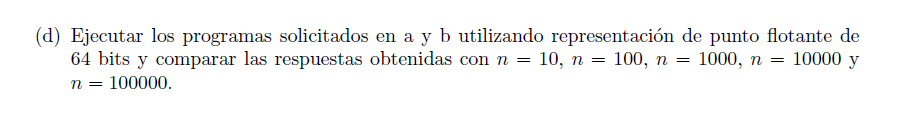

Ejecución con punto flotante de 64 Bits

In [ ]:
#PARAMETROS NEWTON RAPHSON 

"""Elegimos una tolerancia de 1e-15 ya que con punto flotante de 64 bits nos aseguramos de tener 15 digitos signicativos bien"""      

tolerancia = 1e-15 
semilla = np.float64(3)
num_iteraciones = 10

raiz, iteraciones, historia = Newton_Raphson(f, f_derivada, semilla, tolerancia, num_iteraciones, np.float64)
imprimir_tabla_NR(tolerancia, historia)

#LEIBNIZ
calcular_leibniz(np.float64)

Newton Raphson:
|----------------------------------------------------------------
|Iteracion 	 Raiz 		 Tolerancia usada: 1e-15
|----------------------------------------------------------------
| 0.0 		 3.0
| 1.0 		 3.142546543074278
| 2.0 		 3.141592653300477
| 3.0 		 3.141592653589793
| 4.0 		 3.141592653589793
|----------------------------------------------------------------

Serie de Leibniz:
|----------------------------------------------------------------
| Con n =  10 la aproximacion de Pi es: 3.0418396189294032
| Con n =  100 la aproximacion de Pi es: 3.1315929035585537
| Con n =  1000 la aproximacion de Pi es: 3.140592653839794
| Con n =  10000 la aproximacion de Pi es: 3.1414926535900345
| Con n =  100000 la aproximacion de Pi es: 3.1415826535897198
|----------------------------------------------------------------


El metodo de NR converge a una mejor aproximación de π con muchos menos iteraciones que Leibniz. Con el metodo de Leibniz se ve que la cantidad de digitos signicativos asegurados dependen de multiplicar n por diez (n = 10^x, x = cantidad de dig. sig)

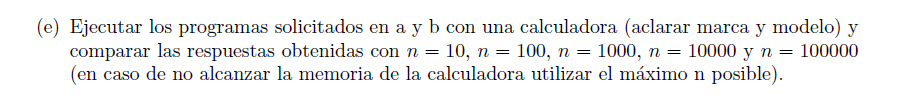

Ejecución con calculadora:

  Marca: Texas Instruments   
  Modelo: TI-83 Premium CE


---


Newton Raphson:

Con semilla = 3

En la iteracion nº:
1.   la raiz da : 3.142546543
2.   la raiz da : 3.141592653
3. la raiz da : 3.141592654




---


  Leibniz:

  Con n = 10 la aproximacion de Pi es : 3.041839619

  Con n = 100 la aproximacion de Pi es : 3.131592904

  Con n = 1000 la aproximacion de Pi es : 3.140592654

  Con n = 10000 la aproximacion de Pi es : 3.141492654

  Con n = 100000 la aproximacion de Pi es : 3.141582654

  (Las 10 iteraciones despues del 100000 valen: ± 1.99991001e-5)

  ---
  Se ve que la calculadora tiene una mayor precision que el de punto flotante de 32 bits pero peor que la de 64 bits. Aun asi parece no afectar mucho en la serie de Leibniz ya que la precision depende mas de la cantidad de iteraciones.



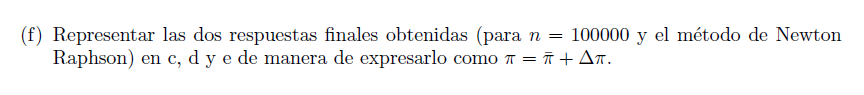

F) Newton Raphson:

*   C) π = 3.1415927 ± 0.0000001
*   D) π = 3.141592653589793 ± 0.000000000000001
*   E) π = 3.141592654 ± 0.000000001

Leibniz:
para n = 100000

In [ ]:
print(calcular_error_leibniz(n(5), np.float32))
print(calcular_error_leibniz(n(5), np.float64))

1.9990119e-05
1.9990109790807356e-05


*   C) π = 3.14158 ± 0.00002
*   D) π = 3.14158 ± 0.00002
*   E) π = 3.14158 ± 0.00002

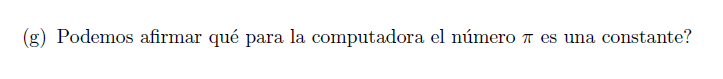

No, ya que es imposible representar los infinitos digitos de π con los recursos limitados de la computadora. Siempre va a tener una cota de error, que hace que sea imposible llegar al numero exacto de π, por ende no se puede considerar una constante. Lo unico que se puede hacer es cambiar la precision que usa el CPU y reducir el error. Por ejemplo, si lo calculamos con una representacion de punto flotante de 32 Bits y despues de 64 Bits, comparando, notamos que la de 32 Bits es menos preciso y tiene mayor ∆π que la de 64 Bits.







-

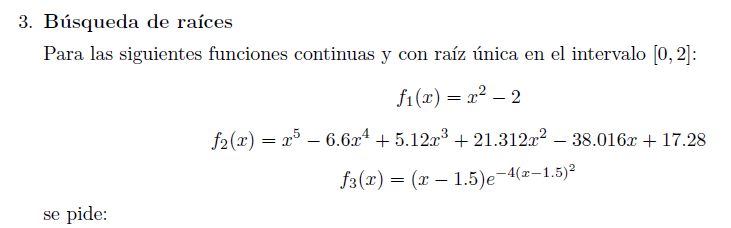

In [ ]:
#Libreria 
import numpy as np

#DEFINICION DE LAS FUNCIONES USADAS Y SUS DERIVADAS 

#FUNCION 1

def f1(x):
    return  x**2 - 2

def f1_derivada(x):
    return 2*x

def f1_d_segunda(x):
    return 2


#FUNCION 2

def f2(x): 
    return x**5 - 6.6 * x**4 + 5.12* x **3 + 21.312 * x**2 -38.016*x + 17.28

def f2_derivada(x):
    return 5* x**4 - 26.4* x**3 + 15.36 * x**2 + 42.624*x - 38.016

def f2_d_segunda(x):
    return  20* x**3 - 79.2* x**2 + 30.72 * x + 42.624

#FUNCION 3

def f3(x):
    return (x - 1.5)* np.exp(-4*((x-1.5)**2))

def f3_derivada(x):
    return (-8*x + 12.0)*(x-1.5)*np.exp(-4*((x-1.5)**2)) + np.exp(-4*((x-1.5)**2))

def f3_d_segunda(x):
    return (8*x - 12.0)* np.exp(-4*((x-1.5)**2)) + (24 -16*x)*np.exp(-4*((x-1.5)**2)) + (x - 1.5)*np.exp(-4*((x-1.5)**2))*((12 - 8*x)**2)



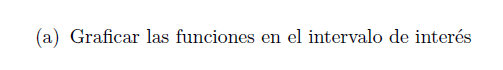

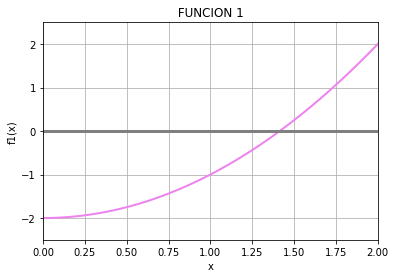

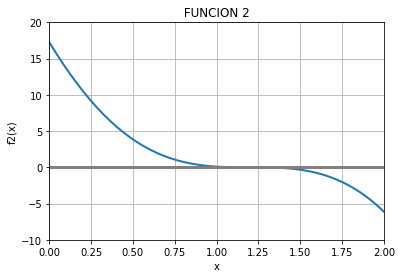

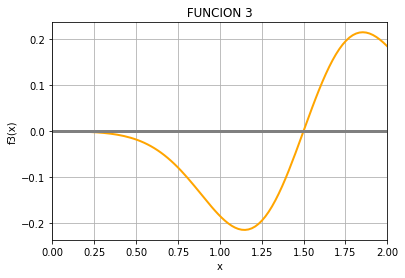

In [ ]:
#import numpy as np
from matplotlib import pyplot as plt
from pylab import *

x = np.linspace(-1,3,200)
F1 = f1(x)
F2 = f2(x)
F3 = f3(x)

plt.figure(1)
plt.plot(x,F1, color = "Violet", linewidth = 2)
plt.title(" FUNCION 1 ")
plt.grid()
plt.xlabel("x")
plt.ylabel("f1(x)")
plt.xlim(0,2.0)
plt.ylim(-2.5,2.5)
plt.axhline(y=0, color= "grey", lw = 3)
plt.show()
print("\n")
plt.figure(2)
plt.plot(x,F2,  linewidth = 2)
plt.title(" FUNCION 2 ")
plt.grid()
plt.xlabel("x")
plt.ylabel("f2(x)")
plt.xlim(0,2.0)
plt.ylim(-10,20)
plt.axhline(y=0, color= "grey", lw = 3)
show()
print("\n")
plt.figure(3)
plt.plot(x,F3, color = "Orange",  linewidth = 2)
plt.title(" FUNCION 3 ")
plt.grid()
plt.xlabel("x")
plt.ylabel("f3(x)")
plt.axhline(y=0, color= "grey", lw = 3)
plt.xlim(0,2.0)
plt.show()

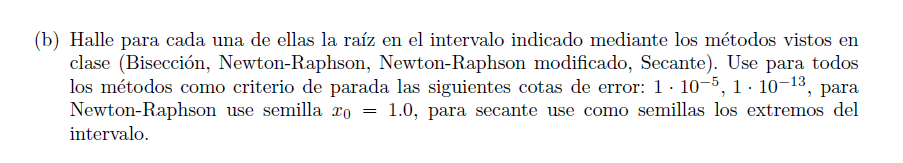

In [ ]:
#LIBRERIAS
from scipy import optimize

#METODOS DE BUSQUEDA DE RAICES

#PARAMETROS

""" Si la cantidad de iteraciones supera este valor se imprime una version 
acotada de la historia para que resulte mas legible"""
TOPE_TABLA = 10

#MAXIMO DE ITERACIONES 
nMax = 50

#TOLERANCIAS 
tolerancia1 = 1e-5
tolerancia2 = 1e-13

#INTERVALO DE ANALISIS + SEMILLAS DE LA SECANTE
a = 0
b = 2

#SEMILLA DE NEWTON-RAPHSON
p0 = 1

#BISECCION

def biseccion(f,a,b,TOL,N0):
    historia = np.zeros((N0+1,2))  
    if f(a)*f(b)>=0:
      print("No puede existir una raiz en el intervalo dado.")
      return 'X',-1,historia[0:1]
    p_anterior = a
    i=1
    
    while i <= N0:
        p_candidata = (a+b)/2
        historia[i] = (i,p_candidata)
                
        if np.abs((p_candidata - p_anterior) / p_candidata) < TOL:
            historia = historia[1:i+1]
            return p_candidata, i, historia
        
        if f(a) * f(p_candidata) > 0:
               a = p_candidata
        else:
            b = p_candidata
        
        i += 1
        p_anterior = p_candidata
     
    print("No convergio.")
    return p_candidata,i,historia

def secante(f,p0,p1,TOL,N0):
   
    p_prev2 = p0
    p_prev1 = p1
    
    historia = np.zeros((N0+2,2)) 
    historia[0] = (0,p_prev2)
    historia[1] = (0,p_prev1)
    boundZero = 1e-14
    i = 2 
    while i<= N0+1:
        
        if(np.abs(f(p_prev1) - f(p_prev2)) < boundZero ):
            print("\n El divisor se anula en la iteracion",i)
            return p_candidata,i-1, historia[0:i]
        
        p_candidata = p_prev1 - ((f(p_prev1)*(p_prev1-p_prev2))/( f(p_prev1) - f(p_prev2)))
        historia[i] = (i-1,p_candidata)
       
        if np.abs((p_candidata - p_prev1) / p_candidata) < TOL:
            historia = historia[0:i+1]
            return p_candidata,i, historia
             
        i += 1
        p_prev2 = p_prev1
        p_prev1 = p_candidata
         
        
    print("No convergio")
    return 'X',i,historia[0:i+1]


def NewtonRaphson(f, f_derivada, p0,TOL,N0):
    boundZero = 1e-20
    historia = np.zeros((N0+1,2))    
    p_prev = p0
    historia[0] = (0,p_prev)          
    i=1
    while i <= N0:
        
        if np.abs(f_derivada(p_prev)) < boundZero:
            print(" Derivada se anula en un punto candidato en la iteracion ",i)
            return p0,i-1,historia[0:i]
        else:
            p_candidata = p_prev - f(p_prev) / f_derivada(p_prev)
            historia[i] = (i,p_candidata)
            
            if np.abs((p_candidata - p_prev) / p_candidata) < TOL:
                historia = historia[0:i+1]
                return p_candidata, i, historia
            i += 1
            p_prev = p_candidata
    print("No convergio")
    return p0,i,historia    
"""
def NewtonRaphson_modificado(f, f_derivada,f_segunda, p0,TOL,N0):
    
    boundZero = 1e-20
    historia = np.zeros((N0,2))    
    p_prev = p0
    historia[0] = (0,p_prev)          
    i=1
    while i < N0:
        
        if np.abs((f_derivada(p_prev)**2 - f(p_prev)*f_segunda(p_prev))) < boundZero:
            print("Divisor se anula en un punto candidato en la iteracion ",i)
        p = p_prev - ((f(p_prev)*f_derivada(p_prev))/ (f_derivada(p_prev)**2 - f(p_prev)*f_segunda(p_prev)))
        error = np.abs(f(p)- f(p_prev))

        historia[i] = (i,p)
    
        if error < TOL:
            historia = historia[1:i+1]
            return p, i-1, historia
       
        i += 1
        p_prev = p
    
    print("No convergio")
    return p0,-1,historia
"""
def NewtonRaphson_modificado(f, f_derivada,f_segunda, p0,TOL,N0):
    
    boundZero = 1e-20
    historia = np.zeros((N0+1,2))    
    p_prev = p0
    historia[0] = (0,p_prev)          
    i=1
    while i < N0:
        
        denominador = f_derivada(p_prev)**2 - f(p_prev)*f_segunda(p_prev)

        if np.abs(denominador) < boundZero:
            print("El denominador se anula en la iteracion ",i)
            return p0, i -1, historia[0:i]

        p = p_prev - ((f(p_prev)*f_derivada(p_prev))/denominador)
        error = np.abs((p - p_prev) / p)

        historia[i] = (i,p)
    
        if error < TOL:
            historia = historia[0:i+1]
            return p, i, historia
       
        i += 1
        p_prev = p
    
    
    print("No convergio")
    return p0,i,historia



def imprimir_historia(historia,nIter,tolerancia):
    print("Iteracion","\t","Raiz", "\t\t", "Tolerancia usada:",tolerancia)
    print("---------------------------------------------------------")

    if nIter > TOPE_TABLA:
        for i in range(0,3):
            print(historia[i][0],"\t\t",historia[i][1])
        print(" .\t\t\t .\n .\t\t\t . ")
        for i in range(-3,0):
            print(historia[i][0],"\t\t",historia[i][1]) 
    else: 
        for element in historia:
            print(element[0],"\t\t",element[1])
    print("---------------------------------------------------------")  



def imprimir_historias_completo(f,f_derivada,f_d_segunda):

    raiz_biseccion, nIteraciones_biseccion, historia_biseccion = biseccion (f,a,b,tolerancia1,nMax)

    print("                    METODO DE LA BISECCION               ")
    print("---------------------------------------------------------")

    imprimir_historia(historia_biseccion, nIteraciones_biseccion,tolerancia1) 

    raiz_biseccion, nIteraciones_biseccion, historia_biseccion = biseccion (f,a,b,tolerancia2,nMax)

    imprimir_historia(historia_biseccion, nIteraciones_biseccion,tolerancia2)  



    print("                 METODO DE LA SECANTE                    ")
    print("---------------------------------------------------------")

    raiz_secante,nIteraciones_secante, historia_secante = secante(f,a,b,tolerancia1,nMax)

    imprimir_historia(historia_secante, nIteraciones_secante, tolerancia1)

    raiz_secante,nIteraciones_secante, historia_secante = secante(f,a,b,tolerancia2,nMax)

    imprimir_historia(historia_secante, nIteraciones_secante, tolerancia2)

    
    print("                 METODO DE NEWTON RAPHSON                ")
    print("---------------------------------------------------------")

    raiz_NR, nIteraciones_NR, historia_NR = NewtonRaphson(f,f_derivada,p0,tolerancia1,nMax)
    
    imprimir_historia(historia_NR, nIteraciones_NR, tolerancia1)
    
    raiz_NR, nIteraciones_NR, historia_NR = NewtonRaphson(f,f_derivada,p0,tolerancia2,nMax)

    imprimir_historia(historia_NR, nIteraciones_NR, tolerancia2)

   
    print("            METODO DE NEWTON RAPHSON MODIFICADO           ")
    print("---------------------------------------------------------")

    raiz_NR_mod,nIteraciones_NR_mod, historia_NR_mod = NewtonRaphson_modificado(f,f_derivada,f_d_segunda,p0,tolerancia1, nMax)

    imprimir_historia(historia_NR_mod, nIteraciones_NR_mod, tolerancia1)
    
    raiz_NR_mod,nIteraciones_NR_mod, historia_NR_mod = NewtonRaphson_modificado(f,f_derivada,f_d_segunda,p0,tolerancia2, nMax)

    imprimir_historia(historia_NR_mod, nIteraciones_NR_mod, tolerancia2)

    return historia_biseccion, historia_secante, historia_NR, historia_NR_mod



Cálculo de todas las raices junto con sus historias

FUNCION 1:



In [ ]:
print("---------------------------------------------------------")
print("                        FUNCION 1                        ")
print("---------------------------------------------------------")

historia_biseccion1, historia_secante1, historia_NR1, historia_NR_mod1 = imprimir_historias_completo(f1,f1_derivada,f1_d_segunda)

---------------------------------------------------------
                        FUNCION 1                        
---------------------------------------------------------
                    METODO DE LA BISECCION               
---------------------------------------------------------
Iteracion 	 Raiz 		 Tolerancia usada: 1e-05
---------------------------------------------------------
1.0 		 1.0
2.0 		 1.5
3.0 		 1.25
 .			 .
 .			 . 
16.0 		 1.414215087890625
17.0 		 1.4141998291015625
18.0 		 1.4142074584960938
---------------------------------------------------------
Iteracion 	 Raiz 		 Tolerancia usada: 1e-13
---------------------------------------------------------
1.0 		 1.0
2.0 		 1.5
3.0 		 1.25
 .			 .
 .			 . 
42.0 		 1.414213562372879
43.0 		 1.4142135623731065
44.0 		 1.4142135623729928
---------------------------------------------------------
                 METODO DE LA SECANTE                    
---------------------------------------------------------
Iteracion 	 

FUNCION 2:

In [ ]:
print("\n---------------------------------------------------------")
print("                        FUNCION 2                        ")
print("---------------------------------------------------------")

historia_biseccion2, historia_secante2, historia_NR2, historia_NR_mod2 = imprimir_historias_completo(f2,f2_derivada,f2_d_segunda)


---------------------------------------------------------
                        FUNCION 2                        
---------------------------------------------------------
                    METODO DE LA BISECCION               
---------------------------------------------------------
Iteracion 	 Raiz 		 Tolerancia usada: 1e-05
---------------------------------------------------------
1.0 		 1.0
2.0 		 1.5
3.0 		 1.25
 .			 .
 .			 . 
16.0 		 1.199981689453125
17.0 		 1.1999969482421875
18.0 		 1.2000045776367188
---------------------------------------------------------
Iteracion 	 Raiz 		 Tolerancia usada: 1e-13
---------------------------------------------------------
1.0 		 1.0
2.0 		 1.5
3.0 		 1.25
 .			 .
 .			 . 
42.0 		 1.2000040998495933
43.0 		 1.2000040998498207
44.0 		 1.2000040998499344
---------------------------------------------------------
                 METODO DE LA SECANTE                    
---------------------------------------------------------
Iteracion 

FUNCION 3:

In [ ]:
print("\n---------------------------------------------------------")
print("                        FUNCION 3                        ")
print("---------------------------------------------------------")

historia_biseccion3, historia_secante3, historia_NR3, historia_NR_mod3 = imprimir_historias_completo(f3,f3_derivada,f3_d_segunda)


---------------------------------------------------------
                        FUNCION 3                        
---------------------------------------------------------
                    METODO DE LA BISECCION               
---------------------------------------------------------
Iteracion 	 Raiz 		 Tolerancia usada: 1e-05
---------------------------------------------------------
1.0 		 1.0
2.0 		 1.5
3.0 		 1.25
 .			 .
 .			 . 
16.0 		 1.499969482421875
17.0 		 1.4999847412109375
18.0 		 1.4999923706054688
---------------------------------------------------------
Iteracion 	 Raiz 		 Tolerancia usada: 1e-13
---------------------------------------------------------
1.0 		 1.0
2.0 		 1.5
3.0 		 1.25
 .			 .
 .			 . 
42.0 		 1.4999999999995453
43.0 		 1.4999999999997726
44.0 		 1.4999999999998863
---------------------------------------------------------
                 METODO DE LA SECANTE                    
---------------------------------------------------------

 El divis

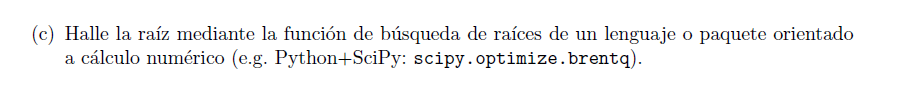

In [ ]:
print("Los valores de las raices calculadas utilizando el paquete SCIPY son:\n ")

print("Para la función 1, la raiz es ",optimize.bisect(f1,a,b))
print("Para la función 2, la raiz es ",optimize.bisect(f2,a,b))
print("Para la función 3, la raiz es ",optimize.bisect(f3,a,b))


Los valores de las raices calculadas utilizando el paquete SCIPY son:
 
Para la función 1, la raiz es  1.4142135623715149
Para la función 2, la raiz es  1.2000045776367188
Para la función 3, la raiz es  1.5


d) Compare los resultados obtenidos para los distintos métodos y cotas, grafique el orden de convergencia P y la constante asisntotica λ para todos los casos. Discuta ventajas y desventajas.¿Son las que esperaba en base a la teoría?

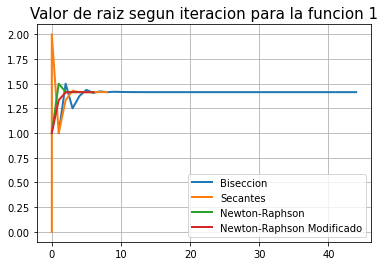

In [ ]:
plt.plot(historia_biseccion1[:,0], historia_biseccion1[:,1], label = "Biseccion",lw = 2)
plt.plot(historia_secante1[:,0], historia_secante1[:,1], label = "Secantes", lw=2)
plt.plot(historia_NR1[:,0], historia_NR1[:,1], label = "Newton-Raphson", lw=2)
plt.plot(historia_NR_mod1[:,0], historia_NR_mod1[:,1], label = "Newton-Raphson Modificado", lw=2)
plt.legend(loc="best")
plt.title("Valor de raiz segun iteracion para la funcion 1", size = 15)
plt.grid()
plt.show()


Usando la biblioteca "ScyPy", la raíz hallada para el función 1 es  1.4142135623715149

Los resultados que obtuvimos con los métodos programados en el presente Trabajo Práctico son congruentes con este último, y además se observa que la convergencia más rápida se encuentra con los métodos de Newton-Raphson, después con el de las secantes, y por último con el de bisección. 

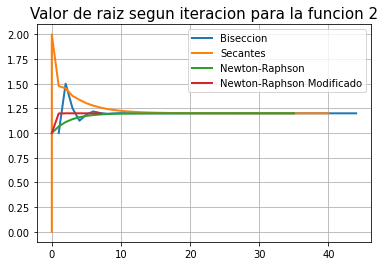

In [ ]:
plt.plot(historia_biseccion2[:,0], historia_biseccion2[:,1], label = "Biseccion",lw = 2)
plt.plot(historia_secante2[:,0], historia_secante2[:,1], label = "Secantes", lw=2)
plt.plot(historia_NR2[:,0], historia_NR2[:,1], label = "Newton-Raphson", lw=2)
plt.plot(historia_NR_mod2[:,0], historia_NR_mod2[:,1], label = "Newton-Raphson Modificado", lw=2)
plt.legend(loc="best")
plt.title("Valor de raiz segun iteracion para la funcion 2", size = 15)
plt.grid()
plt.show()



Usando la biblioteca "ScyPy", la raíz hallada para el función 2 es  1.2000045776367188

Los resultados que obtuvimos con los métodos programados son congruentes con este último, y además se observa que la convergencia más rápida se encuentra con el método de Newton-Raphson modificado. El método de Newton-Raphson converge de manera más lenta porque la raíz de esta función es doble, por lo que el método no debería usarse para esta clase de raíces.

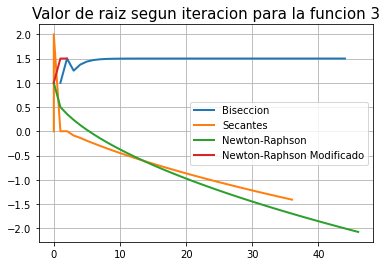

In [ ]:

plt.plot(historia_biseccion3[:,0], historia_biseccion3[:,1], label = "Biseccion",lw = 2)
plt.plot(historia_secante3[:,0], historia_secante3[:,1], label = "Secantes", lw=2)
plt.plot(historia_NR3[:,0], historia_NR3[:,1], label = "Newton-Raphson", lw=2)
plt.plot(historia_NR_mod3[:,0], historia_NR_mod3[:,1], label = "Newton-Raphson Modificado", lw=2)
plt.legend(loc="best")
plt.title("Valor de raiz segun iteracion para la funcion 3", size = 15)
plt.grid()
plt.show()

Usando la biblioteca "ScyPy", la raíz hallada para la función 3 es 1.5

Los métodos que nos sirvieron para hallar la raíz fueron el de Newton-Raphson modificado y el de Bisección, este último tardo más para converger al resultado.
Los otros dos métodos no pudieron converger, ya que las semillas elegidas no fueron las correctas. La semilla elegida para NR no cumple con la condicion de estar lo suficientemente cerca a la raiz. La interseccion de la derivada de la funcion en el punto uno (f'(1)) y el eje x se va alejando de la raiz real

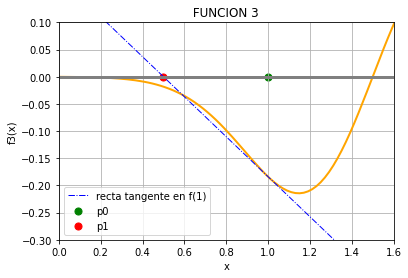

In [ ]:
x = np.linspace(-1,3,200)

F3 = f3(x)
y = f3(1)
m = f3_derivada(1)
b = y - m
recta_tangente = m * x + b


plt.figure(3)
plt.plot(x,F3, color = "Orange",  linewidth = 2)
plt.plot(x,recta_tangente, color = "Blue",  linewidth = 1, ls= "-.", label = "recta tangente en f(1)")
scatter(1,0, 50, color= "Green", label = "p0")
scatter(-b/m,0, 50, color= "Red", label = "p1")
plt.title(" FUNCION 3 ")
plt.grid()
plt.xlabel("x")
plt.ylabel("f3(x)")
plt.axhline(y=0, color= "grey", lw = 3)
plt.xlim(0,1.6)
plt.ylim(-0.3,0.1)
plt.legend()
plt.show()

Repitiendo el proceso con las siguientes raices candidatas, nos alejamos aun mas de la raiz. Por eso diverge.

Algo similar ocurre con el metodo de la secante donde la interseccion de la recta secante y el eje x se aleja cada vez mas de la raiz real

In [ ]:
def CalcularHistoriaDeOrden(historiaRaices,NRmethod = False,Secante = False):

    """Si no tenemos suficientes valores para calcular alfa (y no hubo algun inconveniente en los calculos) podemos decir que el 
    metodo convirgio rapidamente. 
    Por otra parte, en el mejor de los casos, todos los metodos tienen un valor de convergencia maximo, por lo tanto
    en los casos donde tuvimos muy pocas iteraciones asumimos que alfa es el valor maximo de convergencia correspondiente a 
    cada metodo""" 
    if len(historiaRaices) < 5:
        print("casteo por falta de iteraciones")
        if NRmethod:
            return np.array([(0,0),(1,2),(2,2)])
        elif Secante:
            return np.array([(0,0),(1,1.6),(2,1.6)])    

    nIteraciones = len(historiaRaices)
    alfa = np.zeros((nIteraciones - 2, 2))
    
    for n in range(2, nIteraciones - 2):
        a = historiaRaices[n+1][1] - historiaRaices[n][1]
        b = historiaRaices[n][1] - historiaRaices[n - 1][1]
        c = historiaRaices[n - 1][1] - historiaRaices[n - 2][1]

        if (np.abs(np.log10(np.abs(b / c))) < 1e-15) or (np.abs(b) < 1e-15) or (np.abs(c) < 1e-15) or (np.abs(a) < 1e-15) :
            print("Se anula una division en la iteracion ",n-1)
            continue
        else:
            alfa[n - 1] = (n - 1, np.log10(np.abs(a / b)) / np.log10(np.abs(b / c)))
    
    """print("---------------------------------------------------------")

    print(alfa[1:n])

    print("---------------------------------------------------------")"""
    
    return alfa[:nIteraciones - 3]


def CalcularHistoriaConstanteAsintotica(historia, alfa):

    print("Alfa usado:", alfa)

    tope = len(historia)
    if tope < 4:
      return np.array([(0,0.5),(1,0.5),(2,0.5)])
    j = 0
    historiaConstanteAsintotica = np.zeros((tope - 2, 2))

    for i in range(1, tope - 2):
        xMas1 = historia[i+1][1]
        x = historia[i][1]
        xMenos1 = historia[i-1][1]

        numerador = abs(xMas1 - x) 
        denominador = abs(x - xMenos1) ** alfa 
        #print("numerador", numerador, "denominador", denominador)
        if numerador < 1e-15 or denominador < 1e-15 or xMas1 < 1e-15 or x < 1e-15 or xMenos1 < 1e-15 or (numerador / denominador) < 1e-15 :
            #print("entraste")
            continue
        else:
            constanteActual = numerador / denominador
            historiaConstanteAsintotica[j][1] = constanteActual
            historiaConstanteAsintotica[j][0] = j
            j = j+1
    
    historiaConstanteAsintotica = historiaConstanteAsintotica[:j]
    """print("---------------------------------------------------------")

    print(historiaConstanteAsintotica)

    print("---------------------------------------------------------")
    """
    return historiaConstanteAsintotica


#Gráfico y cálculo del Orden de Convergencia y la Constante Asintótica de la función 1


 alfa biseccion funcion 1

 alfa secante funcion 1

 alfa NR funcion 1

 alfa NR mod 1




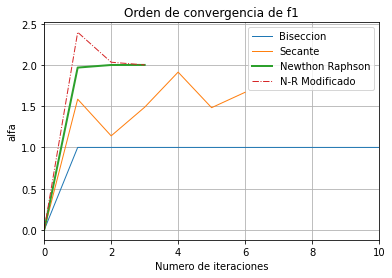

In [ ]:


print("\n alfa biseccion funcion 1")
alfa_biseccion1 = CalcularHistoriaDeOrden(historia_biseccion1)
print("\n alfa secante funcion 1")
alfa_secante1 = CalcularHistoriaDeOrden(historia_secante1)
print("\n alfa NR funcion 1")
alfa_NR1 = CalcularHistoriaDeOrden(historia_NR1)
print("\n alfa NR mod 1")
alfa_NR_mod1 = CalcularHistoriaDeOrden(historia_NR_mod1)
print("\n")

plt.figure(1)
plt.plot(alfa_biseccion1[:,0],alfa_biseccion1[:,1],lw = 1, label = "Biseccion")
plt.plot(alfa_secante1[:,0],alfa_secante1[:,1], lw = 1, label = "Secante")
plt.plot(alfa_NR1[:,0],alfa_NR1[:,1], lw = 2, label = "Newthon Raphson")
plt.plot(alfa_NR_mod1[:,0],alfa_NR_mod1[:,1], linestyle = "-.", lw = 1,  label = "N-R Modificado")

plt.title("Orden de convergencia de f1")
plt.xlabel("Numero de iteraciones")
plt.ylabel("alfa")
plt.legend( loc = 'best')
plt.grid()
plt.xlim(0,10)
plt.show()


Alfa usado: 1.0
Alfa usado: 1.668385677771756
Alfa usado: 1.9995089548529263
Alfa usado: 2.0329679302519974




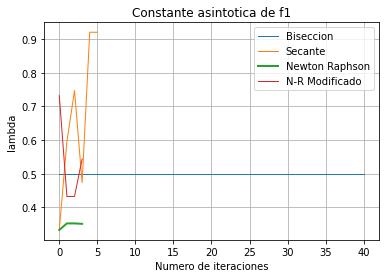

In [ ]:
lambda_biseccion1 = CalcularHistoriaConstanteAsintotica(historia_biseccion1, alfa_biseccion1[-1][1])
lambda_secante1 = CalcularHistoriaConstanteAsintotica(historia_secante1, alfa_secante1[-1][1])
lambda_NR1 = CalcularHistoriaConstanteAsintotica(historia_NR1, alfa_NR1[-2][1])
lambda_NR_mod1 = CalcularHistoriaConstanteAsintotica(historia_NR_mod1, alfa_NR_mod1[-2][1])

plt.figure(1)
plt.plot(lambda_biseccion1[:,0],lambda_biseccion1[:,1],lw = 1, label = "Biseccion")
plt.plot(lambda_secante1[:,0],lambda_secante1[:,1], lw = 1, label = "Secante")
plt.plot(lambda_NR1[:,0],lambda_NR1[:,1], lw = 2, label = "Newton Raphson")
plt.plot(lambda_NR_mod1[:,0],lambda_NR_mod1[:,1], lw = 1,  label = "N-R Modificado")

plt.title("Constante asintotica de f1")
plt.xlabel("Numero de iteraciones")
plt.ylabel("lambda")
plt.legend( loc = 'best')
plt.grid()
plt.show
print("\n")  

Podemos observar como los valores de Alfa  son congruentes con lo que se esperaba en base a la teoría dada, mostrando una convergencia Alfa = 1(lineal) para el método de bisección, una convergencia 1 < Alfa < 2 (supralineal) para el método de las secantes, y una convergencia Alfa = 2 (cuadrática) para los métodos de Newton-Raphson y Newton-Raphson modificado. 

En cuanto a las constantes asintóticas, resultan todas pertenecientes al intervalo (0,1), lo cual es correcto en base a la teoría.



#Gráfico y cálculo del Orden de convergencia de la función 2

 alfa biseccion funcion 2

 alfa secante funcion 2
Se anula una division en la iteracion  38

 alfa NR funcion 2

 alfa NR mod 2




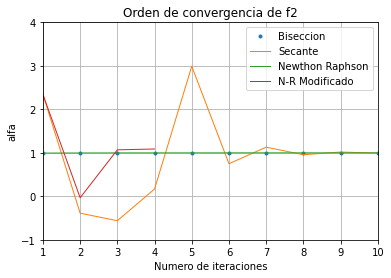

In [ ]:
print(" alfa biseccion funcion 2")
alfa_biseccion2 = CalcularHistoriaDeOrden(historia_biseccion2)
print("\n alfa secante funcion 2")
alfa_secante2 = CalcularHistoriaDeOrden(historia_secante2)
print("\n alfa NR funcion 2")
alfa_NR2 = CalcularHistoriaDeOrden(historia_NR2,NRmethod =True)
print("\n alfa NR mod 2")
alfa_NR_mod2 = CalcularHistoriaDeOrden(historia_NR_mod2,NRmethod = True)

print("\n")
plt.figure(2)
plt.plot(alfa_biseccion2[:,0],alfa_biseccion2[:,1],'.', lw = 5, label = "Biseccion")
plt.plot(alfa_secante2[:len(alfa_secante2)-2,0],alfa_secante2[:len(alfa_secante2)-2,1], lw = 1, label = "Secante")
plt.plot(alfa_NR2[:,0],alfa_NR2[:,1], lw = 1, label = "Newthon Raphson")
plt.plot(alfa_NR_mod2[:,0],alfa_NR_mod2[:,1], lw = 1,  label = "N-R Modificado")
plt.title("Orden de convergencia de f2")
plt.xlabel("Numero de iteraciones")
plt.ylabel("alfa")
plt.legend( loc = 'best')
plt.grid()
plt.ylim(-1,4)
plt.xlim(1,10)
plt.show()

Alfa usado: 1.0
Alfa usado: 1.013507199429566
Alfa usado: 0.31690490457106646
Alfa usado: 1.0882544363886582




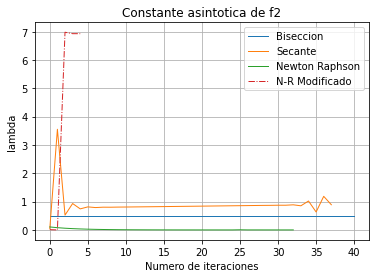

In [ ]:
lambda_biseccion2 = CalcularHistoriaConstanteAsintotica(historia_biseccion2, alfa_biseccion2[-1][1])
lambda_secante2 = CalcularHistoriaConstanteAsintotica(historia_secante2, alfa_secante2[-7][1])
lambda_NR2 = CalcularHistoriaConstanteAsintotica(historia_NR2, alfa_NR2[-1][1])
lambda_NR_mod2 = CalcularHistoriaConstanteAsintotica(historia_NR_mod2, alfa_NR_mod2[-1][1])

plt.figure(2)
plt.plot(lambda_biseccion2[:,0],lambda_biseccion2[:,1], lw = 1, label = "Biseccion")
plt.plot(lambda_secante2[:,0],lambda_secante2[:,1], lw = 1, label = "Secante")
plt.plot(lambda_NR2[:,0],lambda_NR2[:,1], lw = 1, label = "Newton Raphson")
plt.plot(lambda_NR_mod2[:,0],lambda_NR_mod2[:,1], "-.", lw = 1,  label = "N-R Modificado")
plt.title("Constante asintotica de f2")
plt.xlabel("Numero de iteraciones")
plt.ylabel("lambda")
plt.legend( loc = 'best')
plt.grid()
plt.show
print("\n") 

El valor de la orden de convergencia Alfa para el método de Bisección fue lo esperado de acuerdo a la teórica. Sin embargo, los métodos de Newton Raphson y Secante muestran un valor que no se condice con la teoría, ya que debería ser 2 para NR y entre 1 y 2 para Secante, pero en cambio obtuvimos un valor cercano a 1.
Esto se debe a que la función 2 tiene una raíz doble en x = 1.2, por lo que los métodos de Newton Raphson y Secante no logran converger cuadráticamente.

Para el método de Newton Raphson modificado, convergía tan rápido que no se alcanzaron los valores necesarios para calcular el Alfa, y por lo tanto, el Lambda, por lo que también graficamos su valor teórico.

#Cálculo y Gráfico del Orden de convergencia de la función 3 


 alfa biseccion funcion 3

 alfa secante funcion 3

 alfa NR funcion 3

 alfa NR mod 3
casteo por falta de iteraciones

 secante auxiliar

 El divisor se anula en la iteracion 39

 NR auxiliar








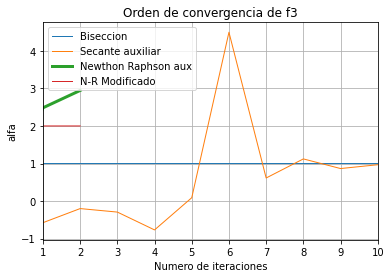

In [ ]:

print("\n alfa biseccion funcion 3")
alfa_biseccion3 = CalcularHistoriaDeOrden(historia_biseccion3)
print("\n alfa secante funcion 3")
alfa_secante3 = CalcularHistoriaDeOrden(historia_secante3)
print("\n alfa NR funcion 3")
alfa_NR3 = CalcularHistoriaDeOrden(historia_NR3)
print("\n alfa NR mod 3")
alfa_NR_mod3 = CalcularHistoriaDeOrden(historia_NR_mod3, NRmethod = True)

#Volvemos a calcular utilzando mejores parametros
print("\n secante auxiliar")
raiz_secante_aux,nIteraciones_secante_aux, historia_secante_aux = secante(f3,1,b,tolerancia2,nMax)
alfa_secante3_aux = CalcularHistoriaDeOrden(historia_secante_aux, Secante = True)

print("\n NR auxiliar")
raiz_NR_aux, nIteraciones_NR_aux, historia_NR_aux = NewtonRaphson(f3,f3_derivada,1.3,tolerancia2,nMax)
alfa_NR3_aux = CalcularHistoriaDeOrden(historia_NR_aux)

#print(historia_NR_aux)
#print(alfa_NR3_aux)

plt.figure(3)
plt.plot(alfa_biseccion3[:,0],alfa_biseccion3[:,1],lw = 1, label = "Biseccion")
plt.plot(alfa_secante3_aux[:,0],alfa_secante3_aux[:,1], lw = 1, label = "Secante auxiliar") 
plt.plot(alfa_NR3_aux[:,0],alfa_NR3_aux[:,1], "-", lw = 3, label = "Newthon Raphson aux")
plt.plot(alfa_NR_mod3[:,0],alfa_NR_mod3[:,1], lw = 1,  label = "N-R Modificado")

#plt.plot(alfa_NR3[:-1,0],alfa_NR3[:-1,1], "-", lw = 1, label = "Newthon Raphson")
#plt.plot(alfa_secante3[3:,0],alfa_secante3[3:,1], lw = 1, label = "Secante") 

print("\n\n\n\n\n")
plt.title("Orden de convergencia de f3")
plt.xlabel("Numero de iteraciones")
plt.ylabel("alfa")
plt.legend( loc = 'best')
plt.grid()
plt.xlim(1,10)
plt.show()



Alfa usado: 1.0
Alfa usado: 0.9761070510087954
Alfa usado: 2.9449227190659193
Alfa usado: 2




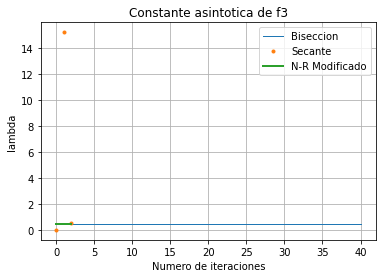

In [ ]:
lambda_biseccion3 = CalcularHistoriaConstanteAsintotica(historia_biseccion3, alfa_biseccion3[-1][1])
lambda_secante3 = CalcularHistoriaConstanteAsintotica(historia_secante_aux, alfa_secante3_aux[-1][1])
lambda_NR3 = CalcularHistoriaConstanteAsintotica(historia_NR3, alfa_NR3_aux[-1][1])
lambda_NR_mod3 = CalcularHistoriaConstanteAsintotica(historia_NR_mod3, alfa_NR_mod3[-1][1])


plt.figure(3)
plt.plot(lambda_biseccion3[:,0],lambda_biseccion3[:,1],lw = 1, label = "Biseccion")
plt.plot(lambda_secante3[:,0],lambda_secante3[:,1],".", lw = 5, label = "Secante")
#plt.plot(lambda_NR3[:,0],lambda_NR3[:,1], "-", lw = 1, label = "Newton Raphson")
plt.plot(lambda_NR_mod3[:,0],lambda_NR_mod3[:,1], "-", lw = 2,  label = "N-R Modificado")
plt.title("Constante asintotica de f3")
plt.xlabel("Numero de iteraciones")
plt.ylabel("lambda")
plt.legend( loc = 'best')
plt.grid()
print('\n')  
plt.show()

Como observamos que para esta función los métodos de Newton-Raphson y el de las Secantes divergen, no nos ocupamos de calcular el Alfa y Lambda correspondiente para esos métodos, en su lugar, graficamos en valor teórico que deberían alcanzar si se cambian las semillas por las correspondientes para que los métodos puedan converger. 
Para el método de Newton Raphson modificado, convergía tan rápido que no se alcanzaron los valores necesarios para calcular el Alfa, y por lo tanto, el Lambda, por lo que también graficamos su valor teórico.

Con el metodo de la secante variado pudimos obtener lo esperado. Por otra parte, con el método de Newton Raphson, probamos varias semillas y siempre nos dieron el mismo resultado. El valor de la raiz al que se aproxima es correcto, pero el alfa calculado da un valor de 3, lo cual matematicamente sabemos que es incorrecto ya que este metodo converge, a lo sumo, cuadraticamente. 

#Conclusiones

A modo de conclusión para este Trabajo Práctico, podemos destacar que los métodos más poderosos a la hora de encontrar una raíz son los de Newton-Raphson, lo que se condice
con la teoría dada. 

También se encontraron dificultades a la hora de hallar el orden de convergencia Alfa y la constante asintótica Lambda para algunos métodos. Creemos que una posible fuente de error fue el redondeo que proviene del uso de notación de punto flotante en la computadora. Además, como trabajamos con números muy cercanos entre sí, el error aumenta al dividir por un número muy pqueño o multiplicando por uno muy grande. Otra fuente de error puede ser que obtenemos el orden de Convergencia a través de una estimación, por lo que le estamos agregando incerteza a un resultado que ya tiene cierto error. 


---

